# Students Performance in Exams Dataset 
## Assignment: Predicting Students' Scores Based on Performance Factors 
## Objective: 
- Predict a student’s math score based on other factors like gender, test preparation, parental 
  education, and lunch type using regression techniques. Alternatively, students can also predict if 
  the student will pass or fail a threshold (classification task). 


# Libarary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assignment Breakdown: 
### 1. Task: Download the dataset from Kaggle and load it using Pandas. 
### 2. Expected Output: 
o A loaded dataset (students_data) overview using .info(), .head(), and 
.describe(). 
o Inspect columns such as gender, race/ethnicity, parental level of 
education, lunch, and the three score columns: math score, reading score, 
and writing score. 

In [2]:
students_data=pd.read_csv("students_data.csv")

In [3]:
students_data.head()

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [4]:
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   STUDENT ID                                                         145 non-null    object
 1   Student Age                                                        145 non-null    int64 
 2   Sex                                                                145 non-null    int64 
 3   Graduated high-school type                                         145 non-null    int64 
 4   Scholarship type                                                   145 non-null    int64 
 5   Additional work                                                    145 non-null    int64 
 6   Regular artistic or sports activity                                145 non-null    int64 
 7   Do you have a partner              

In [5]:
students_data.describe()

,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accommodation type in Cyprus,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034,3.227586
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000,5.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000,7.000000


# Step 2: Data Cleaning 
# 1. Task: 
    o Handle missing values (if any). 
    o Drop irrelevant columns that may not contribute to predicting the target (math 
    score). 
    o Encode categorical features (like gender, parental level of education) 
    using one-hot encoding or label encoding. 
# 2. Expected Output: 
    o A clean dataset ready for analysis with all categorical features converted to 
    numerical form. 


In [6]:
# Cheacking of null values
students_data.isna().sum()

STUDENT ID                                                           0
Student Age                                                          0
Sex                                                                  0
Graduated high-school type                                           0
Scholarship type                                                     0
Additional work                                                      0
Regular artistic or sports activity                                  0
Do you have a partner                                                0
Total salary if available                                            0
Transportation to the university                                     0
Accommodation type in Cyprus                                         0
Mother’s education                                                   0
Father’s education                                                   0
Number of sisters/brothers                                           0
Parent

In [7]:
students_data.duplicated().sum()

0

In [8]:
# Drop Irrelevant Columns
# Adjust the irrelevant columns as necessary
irrelevant_columns = ['STUDENT ID', 'COURSE ID']  # Add any other columns that are not needed
students_data.drop(columns=irrelevant_columns, inplace=True)

In [9]:
# Encode Categorical Features
# Specify the corrected categorical columns
categorical_columns = ['Sex', 'Mother’s education',   # Removed extra space
                       'Transportation to the university', 'Accommodation type in Cyprus']

# Use one-hot encoding for categorical features
students_data = pd.get_dummies(students_data, columns=categorical_columns, drop_first=True)


In [10]:
students_data.head()

,Student Age,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Father’s education,Number of sisters/brothers,Parental status,...,Mother’s education_3,Mother’s education_4,Mother’s education_5,Mother’s education_6,Transportation to the university_2,Transportation to the university_3,Transportation to the university_4,Accommodation type in Cyprus_2,Accommodation type in Cyprus_3,Accommodation type in Cyprus_4
0,2,3,3,1,2,2,1,2,3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,3,3,1,2,2,1,3,2,1,...,0,0,0,0,0,0,0,0,0,0
2,2,2,3,2,2,2,2,2,2,1,...,0,0,0,0,0,0,1,1,0,0
3,1,1,3,1,2,1,2,2,5,1,...,0,0,0,0,0,0,0,1,0,0
4,2,1,3,2,2,1,3,3,2,1,...,1,0,0,0,0,0,0,0,0,1


# Step 3: Exploratory Data Analysis (EDA) 
## 1. Task: 
    o Visualize the distribution of math score and other performance scores. 
    o Check correlations between the target variable (math score) and other features 
    using scatter plots or correlation matrices. 
    o Visualize relationships between categorical features (like gender, test 
    preparation) and the scores. 
## 2. Expected Output: 
    o At least 4 visualizations: 
     Histogram of math score. 
     Bar plots for the relationship between parental level of education
    and math score. 
     Correlation heatmap for scores and other features. 


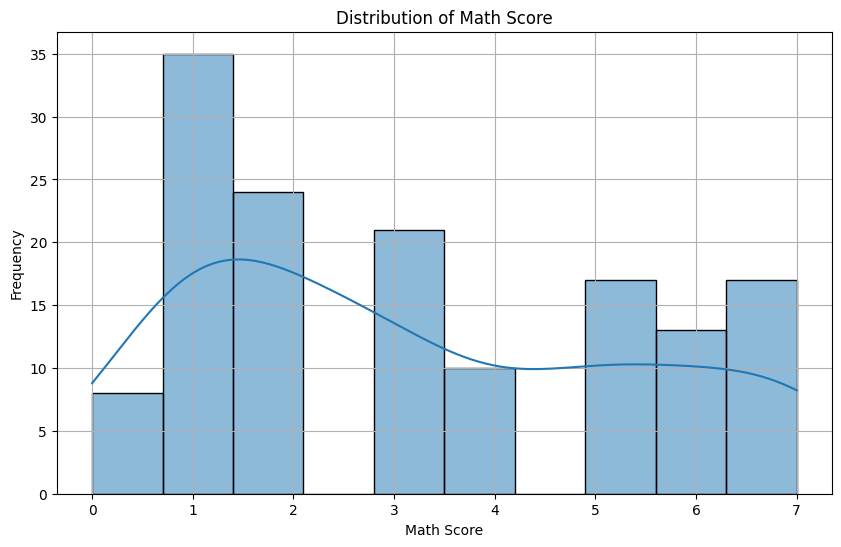

In [11]:
# Plotting the histogram of math scores
plt.figure(figsize=(10, 6))
sns.histplot(students_data['GRADE'], bins=10, kde=True)
plt.title('Distribution of Math Score')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.grid()
plt.show()

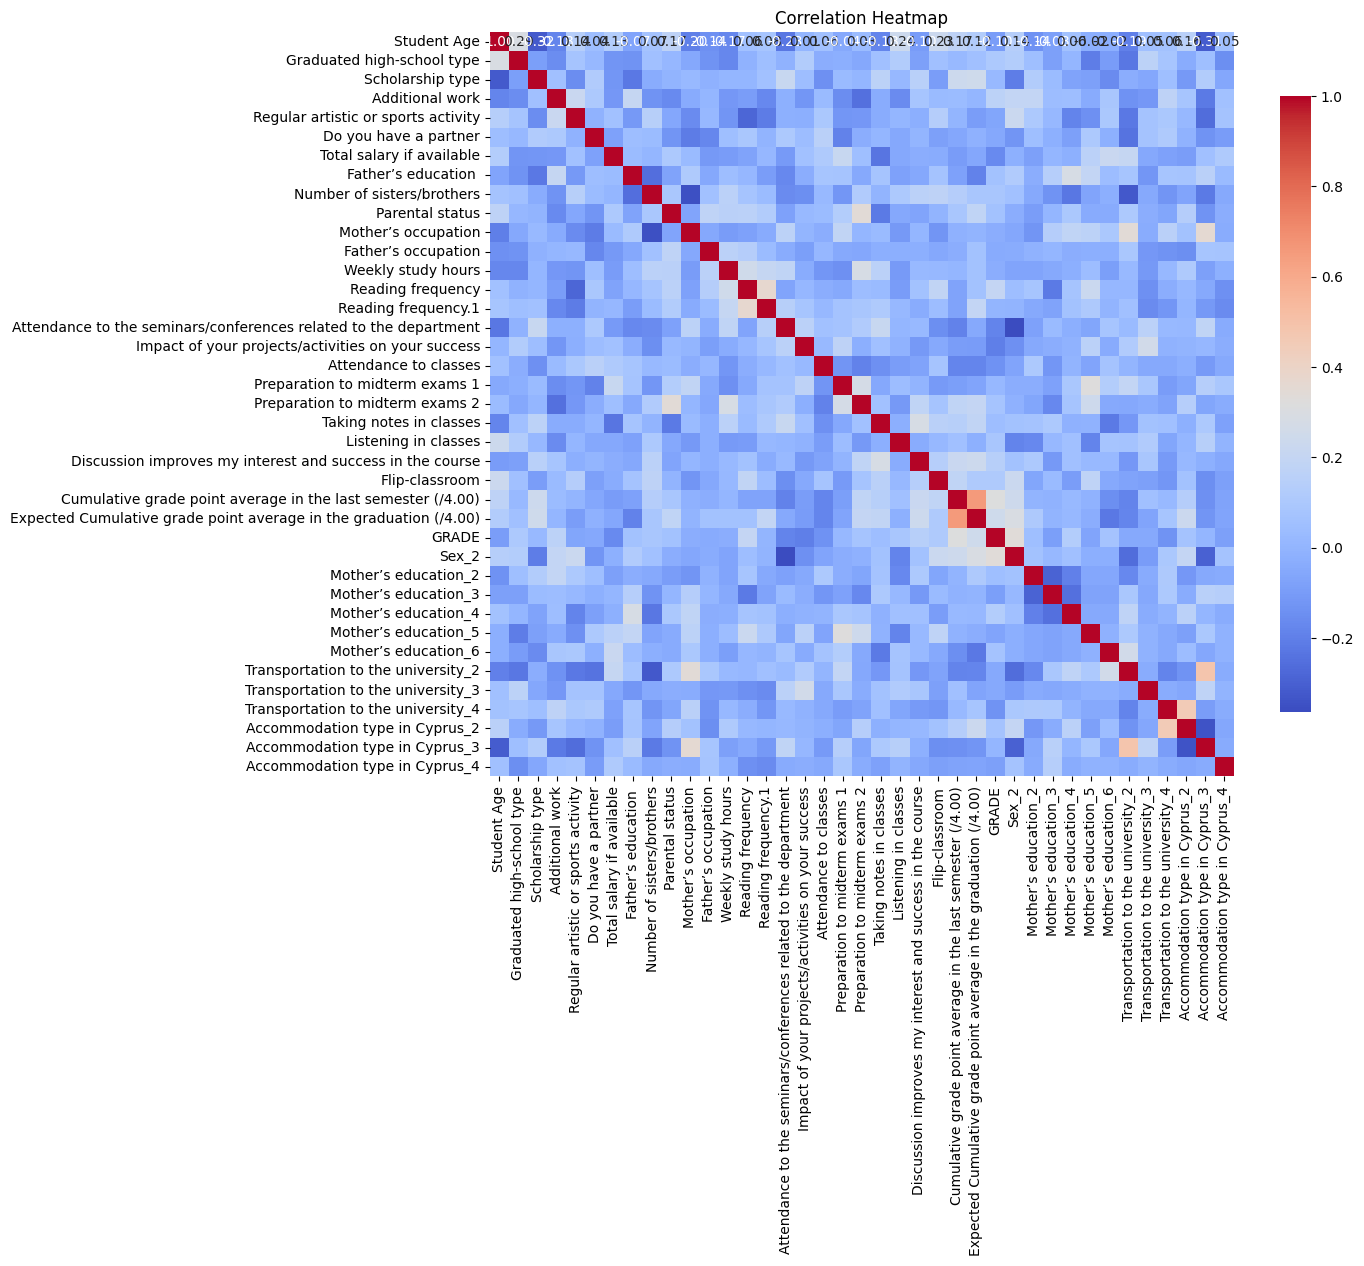

In [12]:
# Calculate the correlation matrix
correlation_matrix = students_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap")
plt.show()


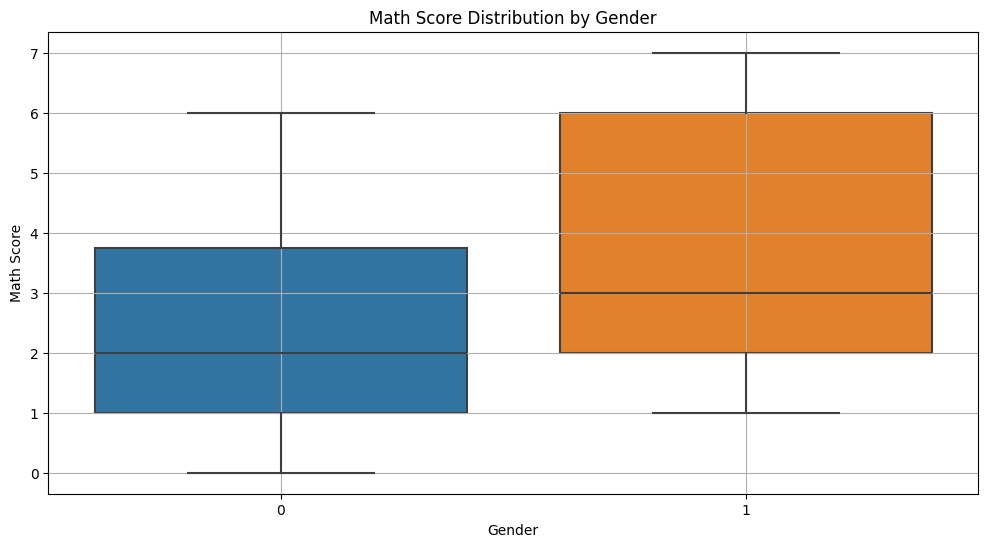

In [13]:
# Box plot 
plt.figure(figsize=(12, 6))
sns.boxplot(data=students_data, x='Sex_2', y='GRADE')
plt.title("Math Score Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Math Score")
plt.grid()
plt.show()


# Step 4: Feature Engineering 
## 1. Task: 
    o Create any necessary new features. For example, you could combine reading 
    score and writing score into a total score column. 
    o Decide if you want to predict the exact score (regression) or a binary outcome 
    (pass/fail). 
## 2. Expected Output: 
    o A new feature like total score. 
    o Binary column for classification (pass/fail) if chosen. 

In [14]:
# Assuming 'Reading frequency' and 'Reading frequency.1' are the relevant columns
# Replace these with the actual score columns you wish to combine
students_data['Total Score'] = (
    students_data['Reading frequency'] + students_data['Reading frequency.1']
)

# Define a threshold for pass/fail
threshold_score = 50  # Adjust this based on your criteria

# Create a binary column for pass/fail
students_data['Pass/Fail'] = (students_data['Total Score'] >= threshold_score).astype(int)

# Display the updated DataFrame
print(students_data[['Total Score', 'Pass/Fail']].head())


   Total Score  Pass/Fail
0            4          0
1            4          0
2            3          0
3            3          0
4            2          0


In [15]:
# Display the first few rows to confirm changes
print(students_data[['Total Score', 'Pass/Fail']].head())


   Total Score  Pass/Fail
0            4          0
1            4          0
2            3          0
3            3          0
4            2          0


# Step 5: Splitting the Data 
## 1. Task: 
    o Split the dataset into training and testing sets (80% training, 20% testing) using 
    train_test_split. 
## 2. Expected Output: 
    o Split data ready for modeling. 


In [16]:
# Features
X = students_data.drop(columns=['Total Score', 'Pass/Fail']) 
X

,Student Age,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Father’s education,Number of sisters/brothers,Parental status,...,Mother’s education_3,Mother’s education_4,Mother’s education_5,Mother’s education_6,Transportation to the university_2,Transportation to the university_3,Transportation to the university_4,Accommodation type in Cyprus_2,Accommodation type in Cyprus_3,Accommodation type in Cyprus_4
0,2,3,3,1,2,2,1,2,3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,3,3,1,2,2,1,3,2,1,...,0,0,0,0,0,0,0,0,0,0
2,2,2,3,2,2,2,2,2,2,1,...,0,0,0,0,0,0,1,1,0,0
3,1,1,3,1,2,1,2,2,5,1,...,0,0,0,0,0,0,0,1,0,0
4,2,1,3,2,2,1,3,3,2,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,2,3,1,1,2,1,2,2,2,...,0,0,0,0,0,0,0,1,0,0
141,1,2,4,2,2,2,1,1,5,1,...,0,0,0,0,0,0,1,1,0,0
142,1,1,4,2,2,2,1,4,4,1,...,1,0,0,0,0,0,0,0,0,0
143,2,2,4,1,1,1,5,4,1,1,...,0,1,0,0,1,0,0,0,1,0


In [17]:
# Target Variables
y = students_data['Total Score']  
y

0      4
1      4
2      3
3      3
4      2
      ..
140    5
141    4
142    4
143    3
144    2
Name: Total Score, Length: 145, dtype: int64

In [18]:
# Split the dataset into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 6: Applying a Machine Learning Model 
## 1. Task: 
    o For regression, apply Linear Regression or Decision Tree Regressor to predict 
    math score. 
    o For classification (pass/fail), apply Logistic Regression or Random Forest. 
## 2. Expected Output: 
    o Model predictions on the test set. 
    o Summary of the model training process. 

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [20]:
classifier = LogisticRegression(max_iter=1000)


In [21]:
# Fit the model on the training data
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

# Predictions of Training Data

In [22]:
y_trian_pred=classifier.predict(X_train)

In [23]:
pd.DataFrame({"orginal":y_train,"predicted":y_trian_pred})

,orginal,predicted
9,4,4
4,2,2
26,5,4
120,2,2
125,5,5
...,...,...
71,3,4
106,4,4
14,4,4
92,4,4


In [25]:
# # Calculate performance metrics
from sklearn.metrics import classification_report
print(classification_report(y_train,y_trian_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        10
           3       1.00      0.67      0.80        15
           4       0.91      1.00      0.95        69
           5       0.94      0.89      0.91        18
           6       1.00      0.75      0.86         4

    accuracy                           0.93       116
   macro avg       0.97      0.86      0.90       116
weighted avg       0.94      0.93      0.93       116



# Preditions on Test Data

In [26]:
y_test_pred=classifier.predict(X_test)

In [27]:
pd.DataFrame({"Orginal":y_test,"predicted":y_test_pred})

,Orginal,predicted
69,3,4
140,5,4
27,4,4
19,4,4
42,3,4
117,5,4
126,5,5
108,5,4
84,4,4
18,5,4


In [30]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_pred))

0.5862068965517241


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           2       1.00      0.67      0.80         3
           3       1.00      0.33      0.50         3
           4       0.57      1.00      0.72        13
           5       0.33      0.12      0.18         8
           6       0.00      0.00      0.00         2

    accuracy                           0.59        29
   macro avg       0.58      0.42      0.44        29
weighted avg       0.55      0.59      0.51        29



C:\Users\SAJID\.jupyter\anaconda.installed\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAJID\.jupyter\anaconda.installed\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAJID\.jupyter\anaconda.installed\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Step 7: Model Evaluation 
## 1. Task: 
    o For regression, evaluate using metrics like R-squared, Mean Absolute Error 
    (MAE), and Root Mean Squared Error (RMSE). 
    o For classification, evaluate with accuracy, precision, recall, and F1-score. Use 
    confusion matrix and ROC curve. 
## 2. Expected Output: 
    o For regression: R-squared, MAE, RMSE. 
    o For classification: accuracy, confusion matrix, ROC curve.

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)  # squared=False returns RMSE
r2 = r2_score(y_test, y_test_pred)

# Output the evaluation metrics
print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


R-squared: 0.51
Mean Absolute Error (MAE): 0.45
Root Mean Squared Error (RMSE): 0.72
